In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/Country-data.csv.xls')

In [3]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [10]:
# Select numerical features (excluding country name)
x = df.drop('country', axis=1)

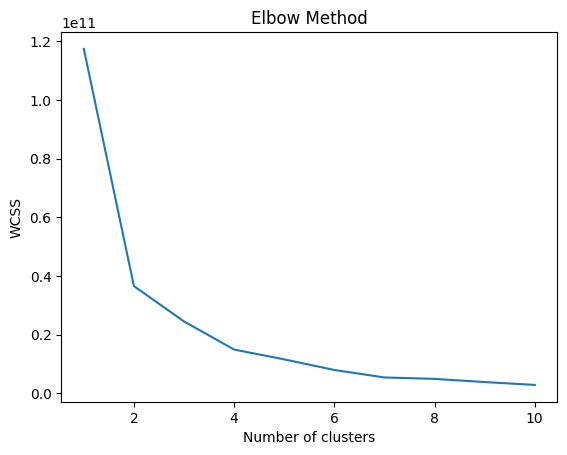

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Applying k-means with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(x)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

In [14]:
# Cluster statistics - exclude the 'country' column which contains strings
cluster_stats = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_stats)

# Count of countries in each cluster
print(df['Cluster'].value_counts())

         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0         54.135185  33.257398  6.321574  45.538573   6381.138889   9.204111   
1          5.070000  55.105000  9.267500  46.905000  47175.000000   2.890700   
2         12.102857  52.294286  6.845143  49.337143  25600.000000   6.595457   
3          4.875000  85.250000  7.640000  61.900000  83625.000000   4.216750   

         life_expec  total_fer          gdpp  
Cluster                                       
0         66.566667   3.519815   3027.259259  
1         80.370000   1.790500  44660.000000  
2         76.062857   1.976857  17347.714286  
3         81.000000   1.792500  84425.000000  
Cluster
0    108
2     35
1     20
3      4
Name: count, dtype: int64


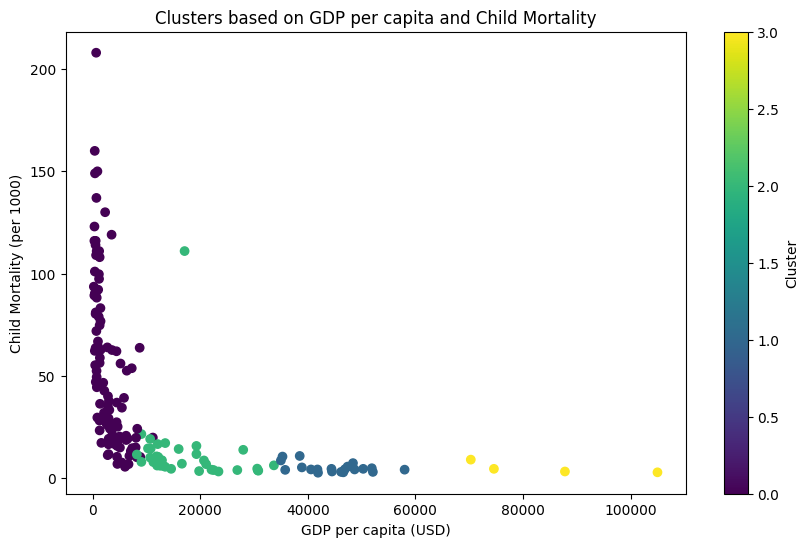

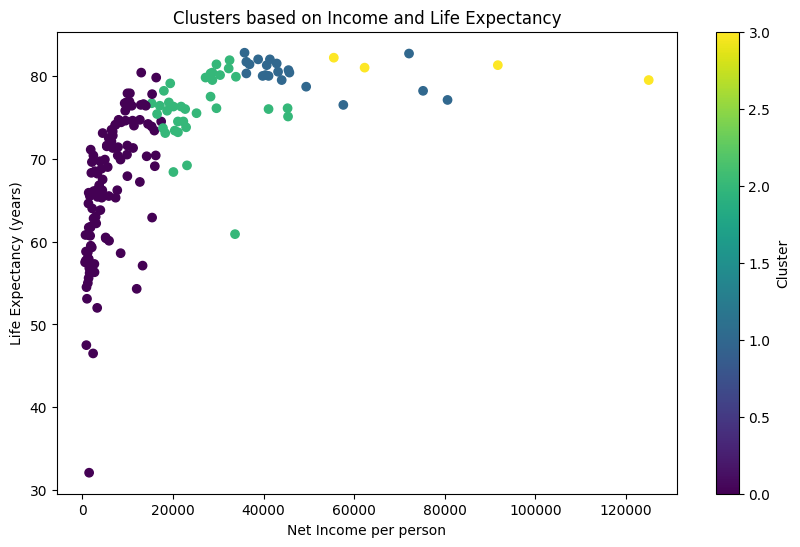

In [15]:
# GDP vs Child Mortality
plt.figure(figsize=(10,6))
plt.scatter(df['gdpp'], df['child_mort'], c=df['Cluster'], cmap='viridis')
plt.title('Clusters based on GDP per capita and Child Mortality')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Child Mortality (per 1000)')
plt.colorbar(label='Cluster')
plt.show()

# Income vs Life Expectancy
plt.figure(figsize=(10,6))
plt.scatter(df['income'], df['life_expec'], c=df['Cluster'], cmap='viridis')
plt.title('Clusters based on Income and Life Expectancy')
plt.xlabel('Net Income per person')
plt.ylabel('Life Expectancy (years)')
plt.colorbar(label='Cluster')
plt.show()